In [6]:
import pandas as pd
import re

# 1. VERİ YÜKLEME
# ARTIK TAM YOL KULLANIYORUZ, GÖRELİ YOL SORUNUNU AŞTIK.
# r'' kullanmak, Windows yolundaki \ işaretlerini doğru okumasını sağlar.
VERI_YOLU = r"C:\Users\ozlem\OneDrive\Belgeler\GitHub\-twitter-sentiment-analizi\data\test.csv" 

try:
    df = pd.read_csv(VERI_YOLU)
    print("✅ Veri başarıyla yüklendi.")
except FileNotFoundError:
    print(f"HATA: Dosya '{VERI_YOLU}' yolunda hala bulunamıyor. Lütfen yolu manuel kontrol edin.")
    raise # Hata durumunda kodu tamamen durdururuz.

# 2. TEMEL TEMİZLİK VE FİLTRELEME
# Sadece text (tweet metni) ve label (etiket) sütunlarını alıyoruz.
df = df[['text', 'label']] 

# 'Notr' etiketlerini kaldırıyoruz. Sadece 'Positive' ve 'Negative' kalacak.
df = df[df['label'] != 'Notr'].reset_index(drop=True)
print(f"\n✅ 'Notr' etiketleri kaldırıldı. Kalan veri satır sayısı: {len(df)}")


# 3. METİN TEMİZLİK FONKSİYONU
def temel_metin_temizligi(text):
    text = str(text)
    # URL'leri, kullanıcı adlarını, noktalama ve sayıları temizler
    text = re.sub(r'http\S+|www\S+|https\S+|@\w+|[^\w\s]|\d+', '', text, flags=re.MULTILINE)
    # Birden fazla boşluğu tek boşluğa indirme ve küçük harfe çevirme
    text = re.sub(r'\s+', ' ', text).strip().lower()
    return text

# Temizleme işlemini uygulama
df['text_temiz'] = df['text'].apply(temel_metin_temizligi)

print("\n✅ Temel metin temizliği yapıldı.")
print("\nİşlenmiş Veri Kontrolü (İlk 5 Satır):")
print(df[['text', 'text_temiz', 'label']].head())


✅ Veri başarıyla yüklendi.

✅ 'Notr' etiketleri kaldırıldı. Kalan veri satır sayısı: 31873

✅ Temel metin temizliği yapıldı.

İşlenmiş Veri Kontrolü (İlk 5 Satır):
                                                text  \
0   ısrarla korkutmayı başarıyor. sanki korku çok...   
1  i phone 5 ten sonra gene 4'' ekranı tercih ett...   
2  arkadaşımın ofisinde gördüm,  tavsiyesi üzerin...   
3   cok sıkıcı bir film birkaç oyuncunun iyi perf...   
4  ürün çok kısa bir sürede geldi ve çok kullanış...   

                                          text_temiz     label  
0  ısrarla korkutmayı başarıyor sanki korku çok u...  Positive  
1  i phone ten sonra gene ekranı tercih ettim tel...  Positive  
2  arkadaşımın ofisinde gördüm tavsiyesi üzerine ...  Positive  
3  cok sıkıcı bir film birkaç oyuncunun iyi perfo...  Negative  
4  ürün çok kısa bir sürede geldi ve çok kullanış...  Positive  


In [7]:
import nltk
# Türkçe tokenization için gereken kaynak
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\ozlem\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [8]:

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# NLTK kütüphanesini kullanmak için gerekli Türkçe dosyasını indirme (ilk çalıştırmada gereklidir)
try:
    # Bu adımı daha önce yapmıştık, ama emin olmak için burada kalsın.
    nltk.download('punkt')
except:
    print("NLTK 'punkt' zaten yüklü.")

# --- 1. Türkçe Stopwords Listesi ---
turkce_stopwords = set([
    "a", "acaba", "ama", "aslında", "az", "bazı", "belki", "biri", "birkaç", "birşey", "biz", "böyle", 
    "bunu", "çünkü", "çok", "çoğu", "de", "da", "daha", "diye", "eğer", "fakat", "falan", "filan", 
    "gibi", "hâlâ", "hangi", "hemen", "her", "herkes", "hiç", "için", "ile", "ise", "ya", "ve", 
    "kim", "mı", "mı", "mu", "mü", "nasıl", "ne", "neden", "nedense", "nerde", "nereye", "niye", 
    "o", "oysa", "oysaki", "öbürü", "ön", "şayet", "şey", "şu", "tüm", "tek", "üzere", "yoksa",
    "bu", "şu", "ki", "mi", "mı", "mu", "mü", "ne", "niye", "hangi", "kime", "kimden"
])

# --- 2. Stopwords Kaldırma ve Tokenization Fonksiyonu ---
def stopword_ve_tokenize(text):
    tokens = word_tokenize(text, language='turkish')
    filtered_tokens = [word for word in tokens if word not in turkce_stopwords and len(word) > 1]
    return " ".join(filtered_tokens) 

# Uygulama
df['text_temiz'] = df['text_temiz'].apply(stopword_ve_tokenize)

print("✅ Stopwords ve Tokenization tamamlandı.")
print("\nİşlenmiş Veri Kontrolü:")
print(df[['text', 'text_temiz']].head())



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ozlem\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


✅ Stopwords ve Tokenization tamamlandı.

İşlenmiş Veri Kontrolü:
                                                text  \
0   ısrarla korkutmayı başarıyor. sanki korku çok...   
1  i phone 5 ten sonra gene 4'' ekranı tercih ett...   
2  arkadaşımın ofisinde gördüm,  tavsiyesi üzerin...   
3   cok sıkıcı bir film birkaç oyuncunun iyi perf...   
4  ürün çok kısa bir sürede geldi ve çok kullanış...   

                                          text_temiz  
0  ısrarla korkutmayı başarıyor sanki korku uzun ...  
1  phone ten sonra gene ekranı tercih ettim telef...  
2  arkadaşımın ofisinde gördüm tavsiyesi üzerine ...  
3  cok sıkıcı bir film oyuncunun iyi performansı ...  
4  ürün kısa bir sürede geldi kullanışlı arabamız...  


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# --- 1. Etiketleri Sayısallaştırma (Negative=0, Positive=1) ---
le = LabelEncoder()
# Etiketleri dönüştürme: Negative -> 0, Positive -> 1
df['label_sayisal'] = le.fit_transform(df['label']) 
print("✅ Etiketler Sayısallaştırıldı. (0: Negative, 1: Positive)")

# --- 2. Veriyi Bağımlı ve Bağımsız Değişkenlere Ayırma ---
# X: Temizlenmiş Metin (bağımsız değişken)
# y: Sayısallaştırılmış Etiket (bağımlı değişken)
X = df['text_temiz']
y = df['label_sayisal']

# --- 3. Eğitim ve Test Setlerine Ayırma (Model Eğitimi için) ---
# Verinin %80'i eğitim, %20'si test için kullanılacak.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

print(f"\n✅ Veri, eğitim ve test setlerine ayrıldı.")
print(f"Eğitim Seti Büyüklüğü: {len(X_train)} satır")
print(f"Test Seti Büyüklüğü: {len(X_test)} satır")

✅ Etiketler Sayısallaştırıldı. (0: Negative, 1: Positive)

✅ Veri, eğitim ve test setlerine ayrıldı.
Eğitim Seti Büyüklüğü: 25498 satır
Test Seti Büyüklüğü: 6375 satır


In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF Vektörleyici Oluşturma
# max_features: En sık kullanılan 5000 kelimeyi alıyoruz.
# ngram_range: Tekli kelimelerin yanı sıra ikili kelime gruplarını da dahil ediyoruz.
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))

# Eğitim verisi üzerinde eğitme ve DÖNÜŞTÜRME
X_train_vec = vectorizer.fit_transform(X_train)

# Test verisini dönüştürme (Sadece transform, fit değil!)
X_test_vec = vectorizer.transform(X_test)

print("✅ TF-IDF Vektörleştirme tamamlandı.")
print(f"Eğitim Matrisi Şekli (Satır, Özellik/Kelime Sayısı): {X_train_vec.shape}")

✅ TF-IDF Vektörleştirme tamamlandı.
Eğitim Matrisi Şekli (Satır, Özellik/Kelime Sayısı): (25498, 5000)


In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import time
import pandas as pd # Import'ları tamamlamak için ekledik

# --- 1. Model Eğitimi ---
print("Model Eğitimi Başlıyor...")
start_time = time.time()

# Lojistik Regresyon modelini tanımlama
# solver='liblinear' büyük veri setleri için hızlıdır.
model = LogisticRegression(solver='liblinear', random_state=42, max_iter=1000)

# Modeli eğitme (X_train_vec: TF-IDF matrisi, y_train: Sayısallaştırılmış etiketler)
model.fit(X_train_vec, y_train)

end_time = time.time()
print(f"✅ Model Eğitimi Tamamlandı. Süre: {end_time - start_time:.2f} saniye")

# --- 2. Tahmin Yapma ---
# X_test_vec test verisi üzerinde tahmin yapma
y_pred = model.predict(X_test_vec)

# --- 3. Model Performansını Değerlendirme ---
print("\n" + "="*50)
print("             MODEL PERFORMANS RAPORU")
print("="*50)

# Doğruluk (Accuracy) Skoru
accuracy = accuracy_score(y_test, y_pred)
print(f"Genel Doğruluk (Accuracy): {accuracy:.4f}\n")

# Detaylı Sınıflandırma Raporu (Precision, Recall, F1-Score)
print("Sınıflandırma Raporu (Classification Report):")
# target_names: 0'ın Negative, 1'in Positive olduğunu belirtir
print(classification_report(y_test, y_pred, target_names=['Negative (0)', 'Positive (1)']))

# Hata Matrisi (Confusion Matrix)
conf_mat = confusion_matrix(y_test, y_pred)
print("Hata Matrisi (Confusion Matrix):")
print(conf_mat)

Model Eğitimi Başlıyor...
✅ Model Eğitimi Tamamlandı. Süre: 0.14 saniye

             MODEL PERFORMANS RAPORU
Genel Doğruluk (Accuracy): 0.9095

Sınıflandırma Raporu (Classification Report):
              precision    recall  f1-score   support

Negative (0)       0.86      0.58      0.69      1131
Positive (1)       0.92      0.98      0.95      5244

    accuracy                           0.91      6375
   macro avg       0.89      0.78      0.82      6375
weighted avg       0.91      0.91      0.90      6375

Hata Matrisi (Confusion Matrix):
[[ 657  474]
 [ 103 5141]]


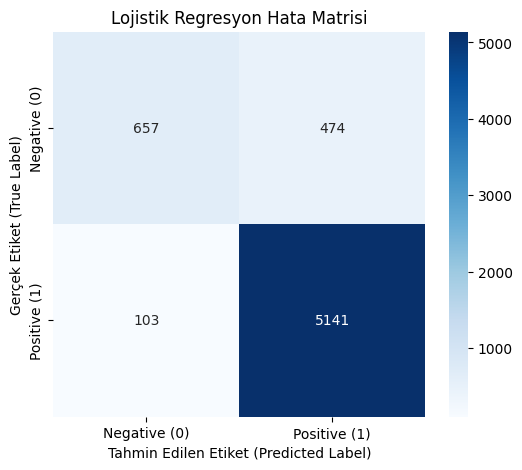

✅ Hata Matrisi görselleştirildi ve şu konuma kaydedildi: C:\Users\ozlem\OneDrive\Belgeler\GitHub\-twitter-sentiment-analizi\figures/confusion_matrix_logistic_regression.png


In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

# figures klasörünüzün mutlak yolunu tanımlıyoruz.
# r'' kullanmak, Windows yolundaki \ işaretlerini doğru okumasını sağlar.
FIGURES_YOLU = r"C:\Users\ozlem\OneDrive\Belgeler\GitHub\-twitter-sentiment-analizi\figures"
DOSYA_ADI = "confusion_matrix_logistic_regression.png"
TAM_YOL = FIGURES_YOLU + "/" + DOSYA_ADI

# Hata Matrisi (Confusion Matrix)
conf_mat = confusion_matrix(y_test, y_pred) 

# Görselleştirme
plt.figure(figsize=(6, 5))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Negative (0)', 'Positive (1)'], 
            yticklabels=['Negative (0)', 'Positive (1)'])

plt.ylabel('Gerçek Etiket (True Label)')
plt.xlabel('Tahmin Edilen Etiket (Predicted Label)')
plt.title('Lojistik Regresyon Hata Matrisi')

# Görseli TAM YOLU kullanarak kaydediyoruz.
plt.savefig(TAM_YOL) 
plt.show()

print(f"✅ Hata Matrisi görselleştirildi ve şu konuma kaydedildi: {TAM_YOL}")